<a href="https://colab.research.google.com/github/ssingh1187/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

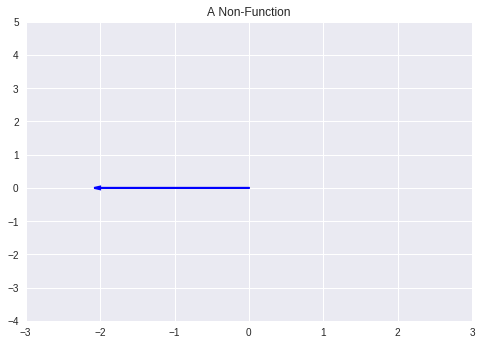

In [13]:
# Graph that passes the vertical line test is called a function: 
# For any value of x, there must be exactly one output (y value)

# Plotting a non-function: for a value of x, y has multiple outputs

import matplotlib.pyplot as plt

x = -2

plt.xlim(-3,3)
plt.ylim(-4,5)
plt.arrow(0,0,-2,0,linewidth=2, head_length=0.08, head_width=0.08, color='b')
plt.title('A Non-Function');

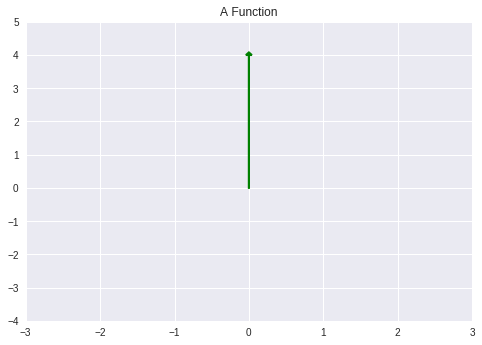

In [14]:
# Plotting a function: For a value of x, there can only be one output

y = 4

plt.xlim(-3,3)
plt.ylim(-4,5)
plt.arrow(0,0,0,4,linewidth=2, head_length=0.08, head_width=0.08, color='g')
plt.title('A Function');

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

For the graph to be a function, it should pass the vertical line test because a function can have only one y value for a certain x value. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}


*   Relation 1 has 2 outputs for x = 1. Hence, not a function
*   Realtion 2 has distinct outputs for different values of x. Hence, its a function
* Relation 3 is not a function
* Relation 4 is not a function
* Relation 5 is not a function








# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

First Transformation matrix:

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
\begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}1 & 3\\-1 & 2\end{bmatrix}
\\
T = \begin{bmatrix}1&3\\-1&2\end{bmatrix}
\end{align}

Second Transformation matrix:

\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\\
\\
\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \begin{bmatrix}4 & 1&2\\-1 & 2&3\\5&1&-2\end{bmatrix}
\\
T = \begin{bmatrix}4&1&2\\-1 & 2&3\\5&1&-2\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
Let x1 = 2, x2 = 3, x3 = 4

###Using Traditional function

1. For p
\begin{align}
p(\begin{bmatrix}2 \\ 3 \end{bmatrix}) = \begin{bmatrix} 2 + 9 \\6 - 2 \\  \end{bmatrix}
\\
p(\begin{bmatrix}2 \\ 3 \end{bmatrix}) = \begin{bmatrix} 11 \\4\\  \end{bmatrix}
\end{align}

2. For q
\begin{align}
q(\begin{bmatrix}2 \\ 3 \\ 4\end{bmatrix}) = \begin{bmatrix} 8 + 3 + 8 \\6 - 2 + 12 \\ 10 - 8 + 3  \end{bmatrix}
\\
\\
q(\begin{bmatrix}2\\3\\4\end{bmatrix}) = \begin{bmatrix}19\\16\\5\end{bmatrix}
\end{align}

###Via Matrix multiplication

1. For p:
\begin{align} 
 T _p=\begin{bmatrix}2\\3\end{bmatrix} \begin{bmatrix}1&3\\-1&2\end{bmatrix}
\end{align}


2. For q:

<!-- q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 
\\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} -->

\begin{align}
T_q = \begin{bmatrix}2\\3\\4\end{bmatrix} \begin{bmatrix}4&1&2\\-1 & 2&3\\5&1&-2\end{bmatrix}
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

1. More data storage space.
2. Less processing speed.
3. More sparse data can lead to inefficiency.
4. More redundant data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5N = P

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [5]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [20]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
x = df.loc[:,features].values

# Separating out the target
y = df.loc[:,]['species'].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [22]:
# PCA projection to 2-D

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principalComponents,
                           columns = ['principal component 1',
                                     'principal component 2'])

principal_df.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [24]:
final_df = pd.concat([principal_df, df[['species']]], axis=1)
final_df.head()

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


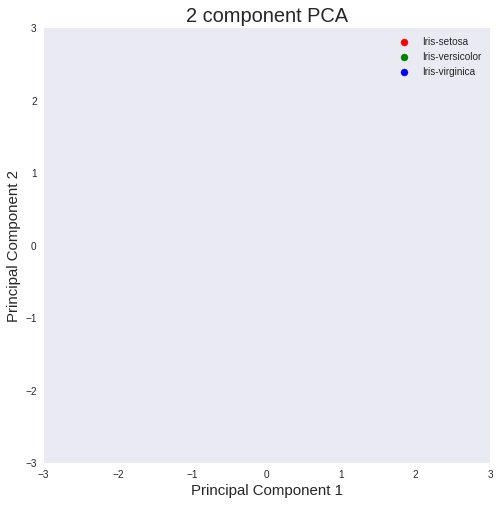

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['species'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Why is this not plotting??

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)